#   <center> <font style="color:rgb(100,109,254)">  Real Time Image Classification with Feature Matching</font> </center>

In the *Feature Matching Notebook* We used a **queryImage**, found some feature points in it, we took another **trainImage**, found the features in that image too and we found the best matches among them. In short, we found locations of some parts of an object in another cluttered image. This information is sufficient to tell if the object is present in trainImage or any other image or not. So now using this knowledge we will build a basic Classification Pipeline.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

##  <font style="color:rgb(134,19,348)">  Store Target Image Descriptors   </font>

First we will store the descriptors and names of all our target images (query images or classes).

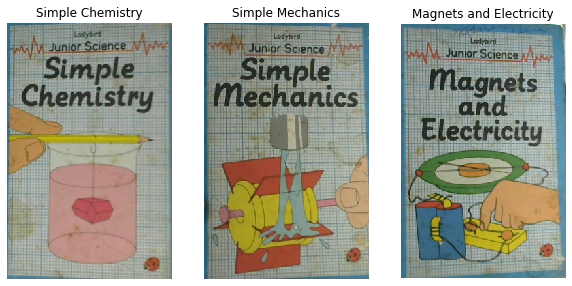

In [63]:
img_names = ['chemcropped.jpg', 'mechcropped.jpg', 'magnetcropped.jpg']
labels = ['Simple Chemistry', 'Simple Mechanics', 'Magnets and Electricity']
descriptors = []

# limit the features to be under 1000.
orb = cv2.ORB_create(1000, fastThreshold=30)
plt.figure(figsize=[10,10])

for name,label in zip(img_names,labels):
    img = cv2.imread(os.path.join('media/M4/' + name), 1)
    
    kp, des = orb.detectAndCompute(img, None)     
    descriptors.append(des) 
    
    plt.subplot(1,len(labels), len(descriptors));plt.imshow(img[:,:,::-1]);
    plt.title("{}".format(labels[len(descriptors)-1]));plt.axis('off')        

**If you have lots of classes then you may want store all images in a folder and all associated labels in a .txt files and read it in a loop from there**

## <font style="color:rgb(134,19,348)"> Classifier Function   </font>
Now that we have all the query descriptors, we will match each of them with the descriptor of any new image (trainImage), the descriptor of the image which has the highest number of good matches with our trainImage will be the best match and we will use its label as the name of the book.

In [51]:
def classifier(img, thresh=0.60, MIN_MATCH_COUNT = 10, vis = True):
    kp, des = orb.detectAndCompute(img, None)
    
    global labels
    
    scores = []
    for descriptor in descriptors:
        
        matches = flann.knnMatch(des,descriptor,k=2)
        
        try:
            good_points = []
            for m,n in matches:
                if m.distance < thresh * n.distance:
                    good_points.append(m)
                    
        # With FLANN you sometimes may face this error when matching is low
        except Exception as e:
            if e == 'not enough values to unpack (expected 2, got 1)':
                good_points = [0]
        # For each descriptor store the number of good matches it gets.       
        scores.append(len(good_points))
    
    
    # Grab the index of the descriptor with highest good matches
    pos = np.argmax(np.array(scores))

    # Also grab the number of good matches of that descriptor.
    points = max(scores)
    
    # Check if there are enough good matches to detrmine if the object is actually present in the Image.
    if points > MIN_MATCH_COUNT:
        # If true then return the the name of book whoose descriptor has the highest matches.
        book_name = labels[pos]
    else:
        book_name = 'None Present'
        
    # If vis is true then just show the results    
    if vis:
        cv2.putText(img,'Book: {}'.format(book_name), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (200,255,155), 2, cv2.LINE_AA)
        plt.figure(figsize=[10,10])
        plt.imshow(img[...,::-1]);plt.title('Book: {}'.format(book_name));plt.axis('off');
        
    # If not return the book_name (We are probably working with a video)    
    else:
        return book_name

**Perform some Initializations**

In [59]:
index_params= dict(algorithm = 6, table_number = 6, key_size = 12, multi_probe_level = 1)
search_params = dict(checks=100)   
flann = cv2.FlannBasedMatcher(index_params,search_params)
orb = cv2.ORB_create(1000, fastThreshold=30)

**Now lets test our Classifier on a sample Image**

Wall time: 80 ms


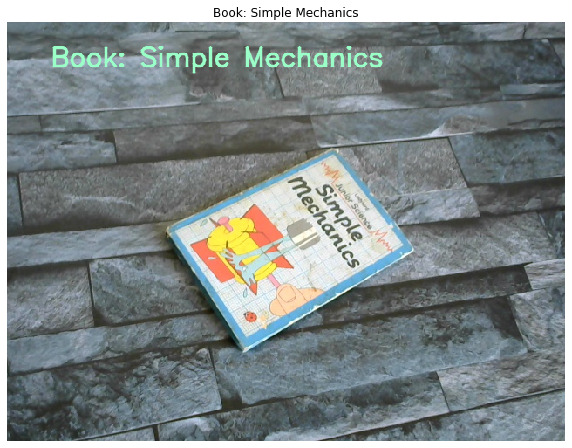

In [74]:
%%time
img = cv2.imread('media/M4/samplemech.jpg',1)
classifier(img)

**Lets test it on another Image**

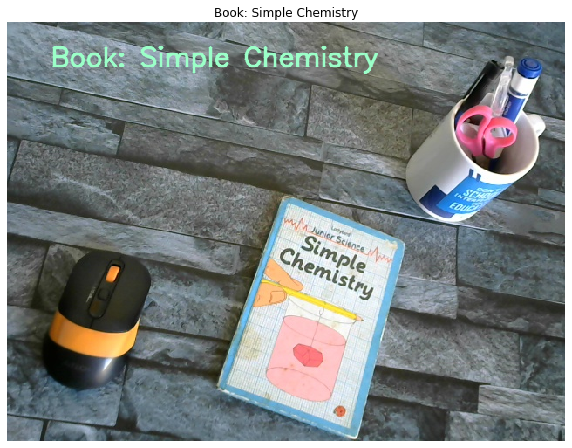

In [31]:
img = cv2.imread('media/M4/samplechem.jpg',1)
classifier(img)

**How about when our book is not present in the Image**

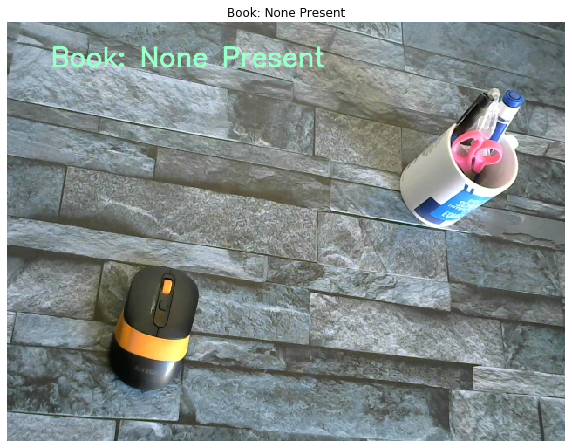

In [32]:
img = cv2.imread('media/M4/samplenone.jpg',1)
classifier(img)

## <font style="color:rgb(134,19,348)"> Real Time Classification on Video   </font>
**Cool, our Classifier seems to work pretty well on Images not lets apply it on Video**

In [53]:
# Using the required driver for full resolution display
cap = cv2.VideoCapture(1,cv2.CAP_DSHOW)

# Using the full resolution of my webcam.
cap.set(3,1280)
cap.set(4,960)

cv2.namedWindow('Classification', cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    # Get the book Name    
    book_name = classifier(frame, vis=False)
    
    cv2.putText(frame,'Book: {}'.format(book_name), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (200,255,155), 2, cv2.LINE_AA)
    cv2.imshow('Classification', frame)
    
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()    

###  <font style="color:rgb(34,169,134)"> Assignment: Feature based Image Classifier </font>
Now your task is to create your own Object Classifier, try to have 5 or more classes, you can also experiment with a different feature detector and a matching technique.

In [75]:
### ADD CODE HERE

